# Project Workbook

## Cleaning the Data File

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy import stats

file = "Net_generation_for_electric_power_by_year.csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Feb 04 2021 20:30:08 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Net generation for electric power,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii : utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [2]:
energy_df=df.drop([0, 1, 2, 4])

In [3]:
energy_df[['Net generation for electric power', 'Energy Source']] = energy_df['Net generation for electric power'].str.split(':', expand=True)
energy_df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Energy Source
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [4]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [5]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df


3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [6]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [7]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [8]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [9]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' utility-scale photovoltaic',
       ' utility-scale thermal', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [10]:
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [11]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

In [69]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [70]:
filtered_df=filtered_df.replace(to_replace=["--", "NM"], value=np.nan) 

filtered_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,4,5,19,39,54,89,175,185,268,renewable


In [71]:
#Drop rows where all year columns have NaN data (count is 19)
filtered_df=filtered_df.dropna(axis=0, thresh=19)


filtered_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [85]:
#Replace remaining NaN values with zero for summing
filtered_df=filtered_df.replace(np.nan, 0)


In [114]:
#Drop extra columns
condensed_df=filtered_df.drop(columns=['Energy_Source', 'units', 'source key'])

#Reformat to apply numerical format to columns in order to allow summing.
condensed_df=condensed_df.apply(pd.to_numeric,errors='ignore')

condensed_df

3,Location,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,1882826,1910613,1952714,1957188,1992054,1969737,1998390,1968838,1741123,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,110260,75079,98593,95770,95667,41665,46970,30226,24341,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,8889,14654,15105,18908,20814,18043,14336,12655,11471,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,554940,607683,567303,627172,683829,734417,814752,802372,841006,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,586,1970,2647,3568,3777,4254,4042,3200,3058,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,2,2,2,7,7,80,238,240,251,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,207,73,178,213,222,212,230,234,168,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,164,169,339,141,134,129,109,112,94,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,164,169,339,141,134,129,109,112,94,...,39,22,29,37,52,89,104,104,108,renewable


## Analysis of Renewable Energy in the US

In [115]:
state_group=condensed_df.groupby(['Renewable','Location'])
state_df=state_group.sum()
state_df

3                                   2001    2002    2003    2004    2005  \
Renewable     Location                                                     
non-renewable Alabama             111130  118612  119557  121502  123153   
              Alaska                4307    4275    4253    4550    4656   
              Arizona              81623   86128   85285   95781   94418   
              Arkansas             42718   41945   45461   45999   42632   
              California          136857  115077  117935  122643  122244   
...                                  ...     ...     ...     ...     ...   
renewable     West North Central   12853   16328   15861   15953   18151   
              West South Central    9406   13305   12659   17164   18775   
              West Virginia          559     632     981     936    1202   
              Wisconsin             2993    3367    2933    3186    2899   
              Wyoming               1609    1478    1326    1827    2242   

3                                   2006    2007    2008    2009    2010  \
Renewable     Location                                                     
non-renewable Alabama             128898  135044  135168  126152  139228   
              Alaska                5031    5144    5267    5045    4964   
              Arizona              96948  106127  111625  104994  104354   
              Arkansas             48592   49376   48356   51225   55350   
              California          130075  143539  144608  137528  131073   
...                                  ...     ...     ...     ...     ...   
renewable     West North Central   21603   25486   36962   53655   65467   
              West South Central   21134   31625   49136   56931   70456   
              West Virginia         1396    1142    1605    2510    2747   
              Wisconsin             3119    3159    4151    5176    6001   
              Wyoming               2361    2239    2761    5419    7518   

3                                   2011    2012    2013    2014    2015  \
Renewable     Location                                                     
non-renewable Alabama             143148  141195  133515  135991  138354   
              Alaska                5125    4969    4505    4065    4273   
              Arizona              98073  102237  104615  102323  102445   
              Arkansas             56303   60751   55662   57000   50117   
              California          117060  128680  126898  127536  124623   
...                                  ...     ...     ...     ...     ...   
renewable     West North Central   80262   91224  102017  113750  120089   
              West South Central   80323   87715  103052  112462  129143   
              West Virginia         3127    3489    3866    3630    3599   
              Wisconsin             6750    7041    7407    8021    7769   
              Wyoming              10448    9631    9577    9681    8382   

3                                   2016    2017    2018    2019  
Renewable     Location                                            
non-renewable Alabama             131076  126067  128898  125947  
              Alaska                4244    4454    4169    4058  
              Arizona              97049   93374   99101  101350  
              Arkansas             55064   55978   62992   58320  
              California          106047   96405   98432   92341  
...                                  ...     ...     ...     ...  
renewable     West North Central  137120  162658  163964  183343  
              West South Central  167006  192666  218787  242511  
              West Virginia         4017    4489    4700    4405  
              Wisconsin             7833    7956    7615    8220  
              Wyoming               9751    9766    9091    9498  

[121 rows x 19 columns]

In [116]:
us_df=condensed_df[condensed_df['Location']=='United States']

us_df

3,Location,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,1882826,1910613,1952714,1957188,1992054,1969737,1998390,1968838,1741123,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,110260,75079,98593,95770,95667,41665,46970,30226,24341,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,8889,14654,15105,18908,20814,18043,14336,12655,11471,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,554940,607683,567303,627172,683829,734417,814752,802372,841006,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,586,1970,2647,3568,3777,4254,4042,3200,3058,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
12,United States,768826,780064,763733,788528,781986,787219,806425,806208,798855,...,790204,769331,789016,797166,797178,805694,804950,807084,809409,non-renewable
13,United States,213749,260491,271512,265064,267040,286254,245843,253096,271506,...,317531,273859,265058,258046,247636,266326,298711,291148,286652,renewable
14,United States,42259,47555,49481,52328,56654,65934,74705,97084,116477,...,163886,188081,221461,247305,263306,309717,354449,382591,409035,renewable
15,United States,6737,10354,11187,14144,17811,26589,34450,55363,73886,...,120121,140749,167742,181496,190547,226790,254074,272396,294628,renewable
17,United States,0,0,2,6,16,15,16,76,157,...,921,3288,7810,14863,21229,32114,49454,59661,68047,renewable


In [122]:
us_group=us_df.groupby('Renewable')
us_group_totals=us_group.sum()
us_group_totals


us_group_totals=us_group_totals.T

us_group_totals['total']=us_group_totals.sum(axis=1)
us_group_totals['Percent renewable']=(us_group_totals['renewable']*100)/us_group_totals['total']

us_group_totals


Renewable,non-renewable,renewable,total,Percent renewable
3,,,,
2001,3341163,301845,3643008,8.285598
2002,3408163,359447,3767610,9.540451
2003,3418230,376280,3794510,9.916432
2004,3509192,374869,3884061,9.651470
2005,3595625,387373,3982998,9.725664
2006,3572789,425999,3998788,10.653203
2007,3702403,403263,4105666,9.822109
2008,3641096,457218,4098314,11.156246
2009,3437221,516681,3953902,13.067623


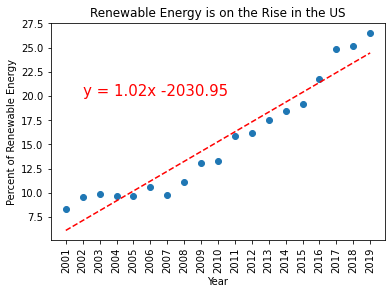

In [164]:
#Graph of renewable energy percentages for the US

year=np.arange(2001,2020,1)
percent_renewable=us_group_totals['Percent renewable']
plt.scatter(year,percent_renewable)
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Percent of Renewable Energy')
plt.title('Renewable Energy is on the Rise in the US')


pr_slope, pr_int, pr_r, pr_p, pr_std_err = stats.linregress(year, percent_renewable)
pr_fit = pr_slope * year + pr_int
plt.plot(year,pr_fit,"--", color='red')

line_eq = "y = " + str(round(pr_slope,2)) + "x " + str(round(pr_int,2))
plt.annotate(line_eq,(2002,20),fontsize=15,color="red")
plt.show()


In [165]:
year = 2020
print(f"The forecasted percentage of renewable energy in the US in 2020 is {round(pr_slope * year + pr_int,2)}.")
year2 = 2021
print(f"The forecasted percentage of renewable energy in the US in 2021 is {round(pr_slope * year2 + pr_int,2)}.")


The forecasted percentage of renewable energy in the US in 2020 is 25.47.
The forecasted percentage of renewable energy in the US in 2021 is 26.49.


If renewable energy were to continue to increase at this rate, the US would reach 100% renewable energy in 2089.

## South Atlantic Region


The South Atlantic region is classified in by EIA as containing the following states:
- Delaware
- District of Columbia
- Florida
- Georgia
- Maryland
- North Carolina
- South Carolina
- Virginia
- West Virginia

